In [2]:
from fastai.vision.all import *

Using fastai tutorial : https://docs.fast.ai/tutorial.vision.html 

In [ ]:
path =  untar_data(URLs.PETS)

In [ ]:
path.ls()

(#3) [Path('C:/Users/scastaneda/.fastai/data/oxford-iiit-pet/annotations'),Path('C:/Users/scastaneda/.fastai/data/oxford-iiit-pet/images'),Path('C:/Users/scastaneda/.fastai/data/oxford-iiit-pet/models')]

In [ ]:
files = get_image_files(path/"images")
len(files)

7390

To know which photos are dogs/cats we need to know which files are labeled dog and cats (lowercase letter = dogs, uppercase = cats)

In [ ]:
files[0], files[6]

(Path('C:/Users/scastaneda/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),
 Path('C:/Users/scastaneda/.fastai/data/oxford-iiit-pet/images/Abyssinian_104.jpg'))

In [ ]:
def label_func(f) : return f[0].isupper()

^Easy label function

In [ ]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms = Resize(224))

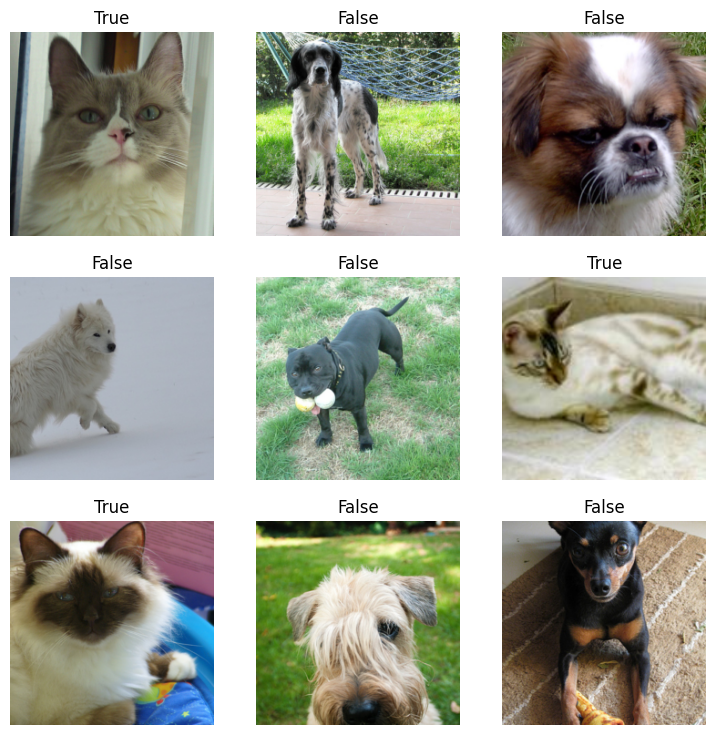

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(1)

In [ ]:
learn.predict(files[0])

('True', tensor(1), tensor([2.9783e-05, 9.9997e-01]))

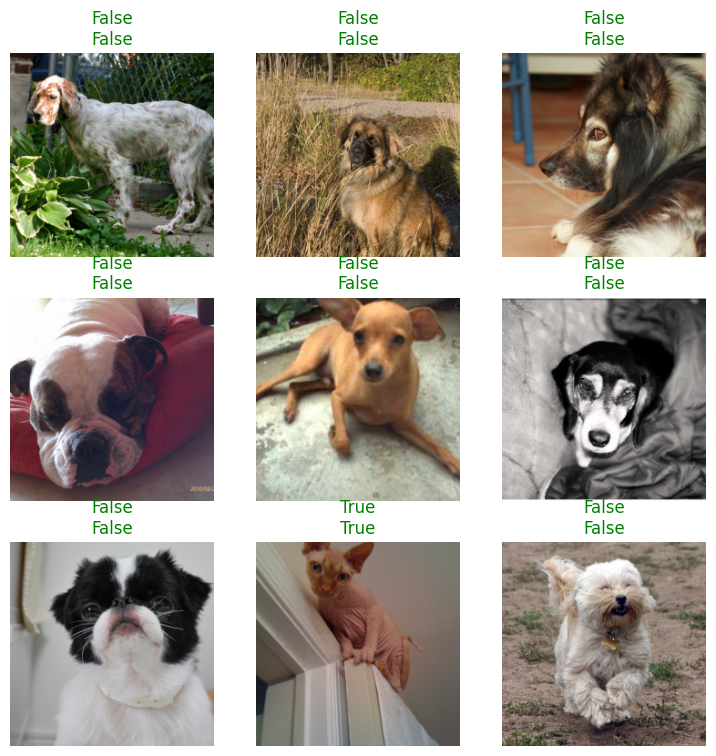

In [ ]:
learn.show_results()

In [ ]:
files[0].name

'Abyssinian_1.jpg'

To see breed name we need to see the actual file name which is ran above.

So everything we need is before the last _. To grab the name we run the expression:

In [ ]:
pat = r'^(.*)_\d+.jpg'

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

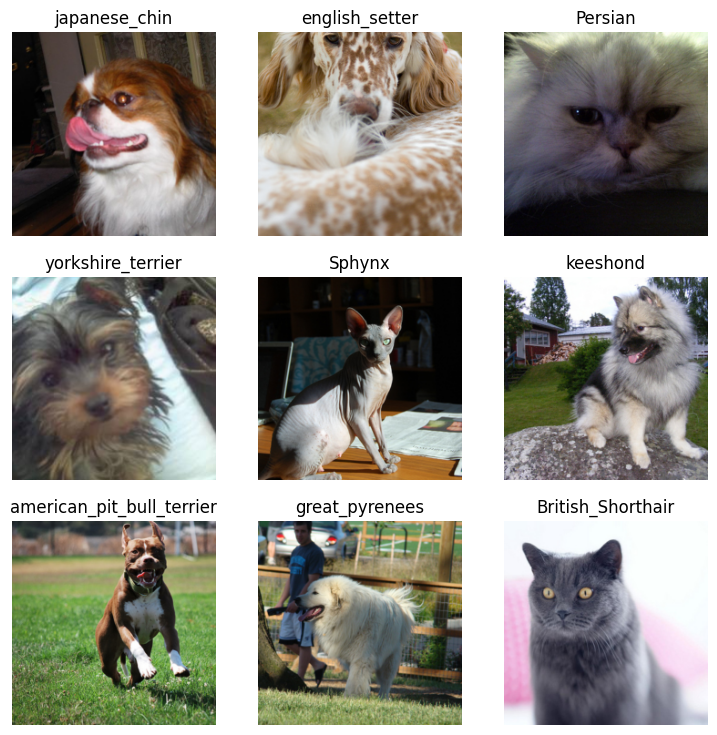

In [ ]:
dls.show_batch()

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
  batch_tfms=aug_transforms(size=224))

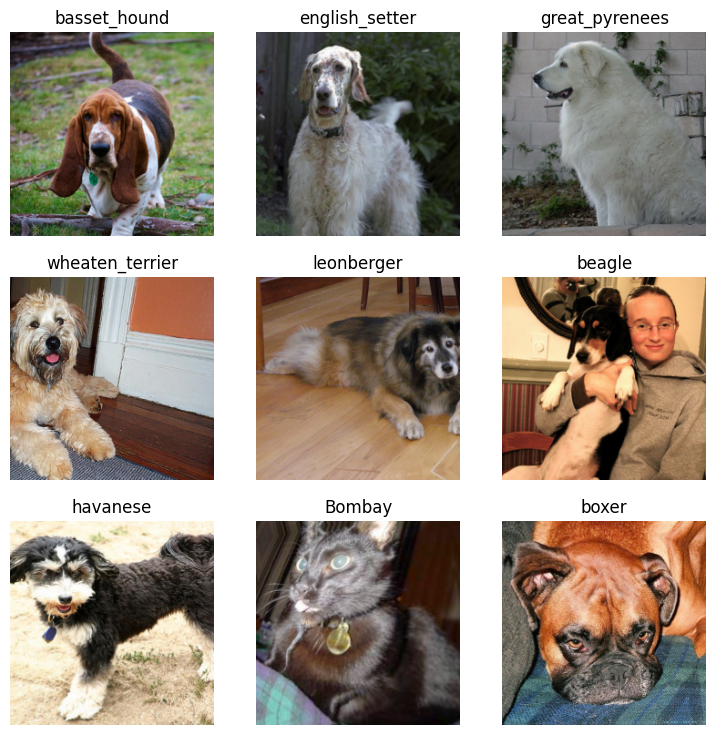

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

Make the Learner

SuggestedLRs(valley=0.0012022644514217973)

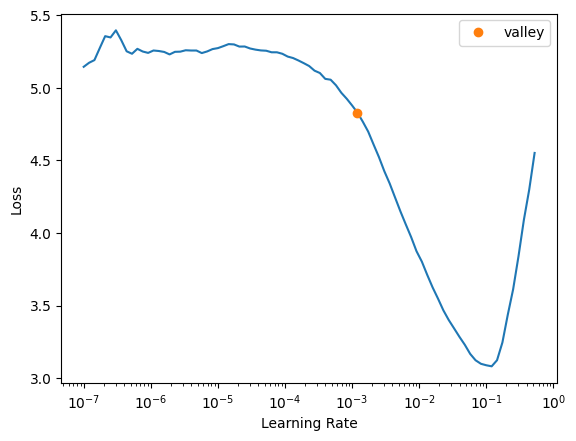

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(2, 3e-3)

This is fine tuning the learning rate

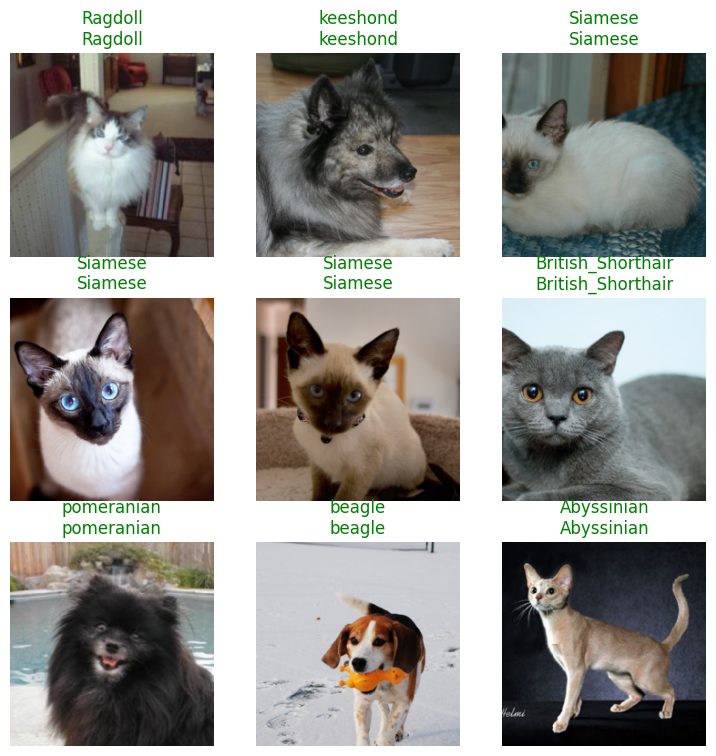

In [25]:
learn.show_results()

In [26]:
interp = Interpretation.from_learner(learn)

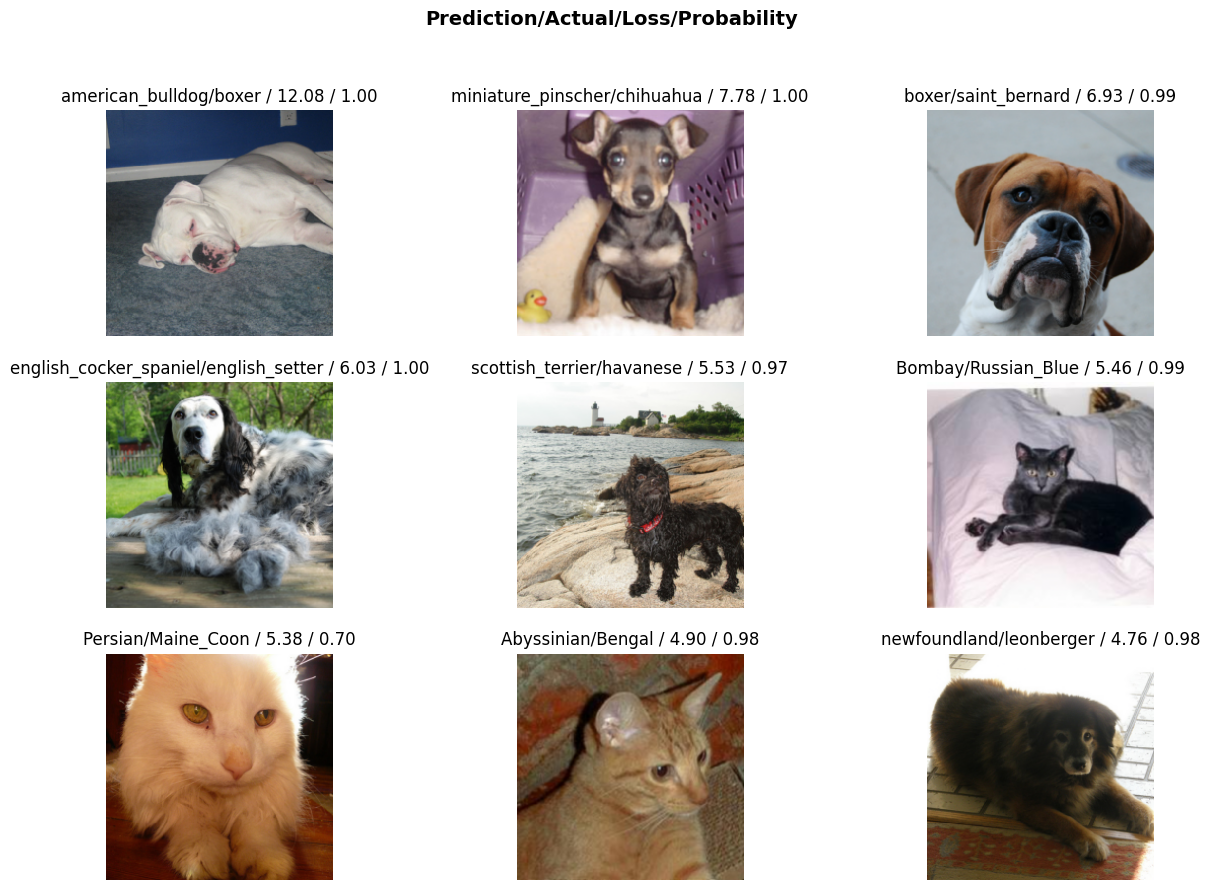

In [27]:
interp.plot_top_losses(9, figsize = (15,10))

In [3]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224))

In [4]:
dls = pets.dataloaders(untar_data(URLs.PETS)/"images")

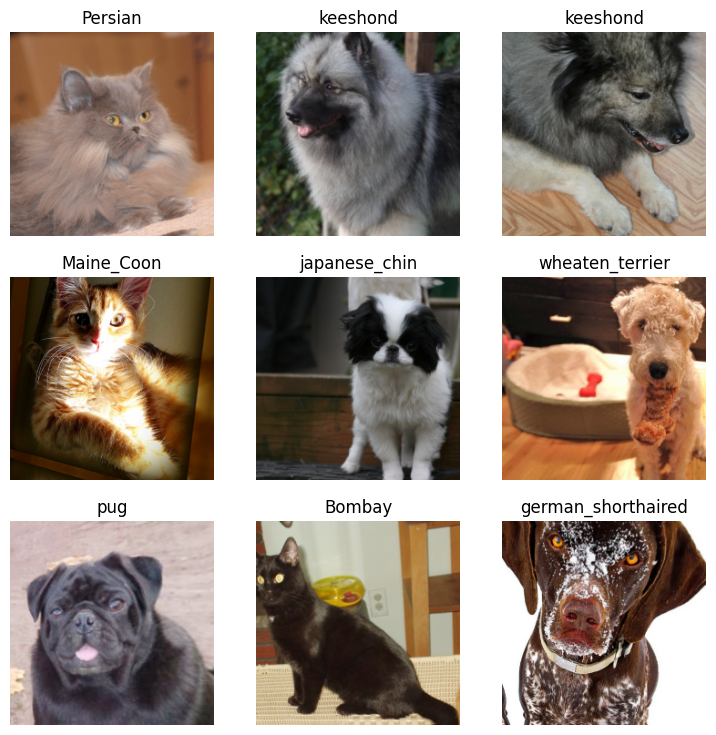

In [5]:
dls.show_batch(max_n = 9)

*Multi Label Classification*

In [6]:
path = untar_data(URLs.PASCAL_2007)
path.ls()

(#9) [Path('C:/Users/scastaneda/.fastai/data/pascal_2007/models'),Path('C:/Users/scastaneda/.fastai/data/pascal_2007/segmentation'),Path('C:/Users/scastaneda/.fastai/data/pascal_2007/test'),Path('C:/Users/scastaneda/.fastai/data/pascal_2007/test.csv'),Path('C:/Users/scastaneda/.fastai/data/pascal_2007/test.json'),Path('C:/Users/scastaneda/.fastai/data/pascal_2007/train'),Path('C:/Users/scastaneda/.fastai/data/pascal_2007/train.csv'),Path('C:/Users/scastaneda/.fastai/data/pascal_2007/train.json'),Path('C:/Users/scastaneda/.fastai/data/pascal_2007/valid.json')]

In [7]:
df = pd.read_csv(path/'train.csv')
df.head()

fname        labels  is_valid
0  000005.jpg         chair      True
1  000007.jpg           car      True
2  000009.jpg  horse person      True
3  000012.jpg           car     False
4  000016.jpg       bicycle      True

In [8]:
dls = ImageDataLoaders.from_df(df, path, folder = 'train', valid_col = 'is_valid', label_delim=' ',
                               item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

c:\Users\scastaneda\AI_Code\fastai\data\transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


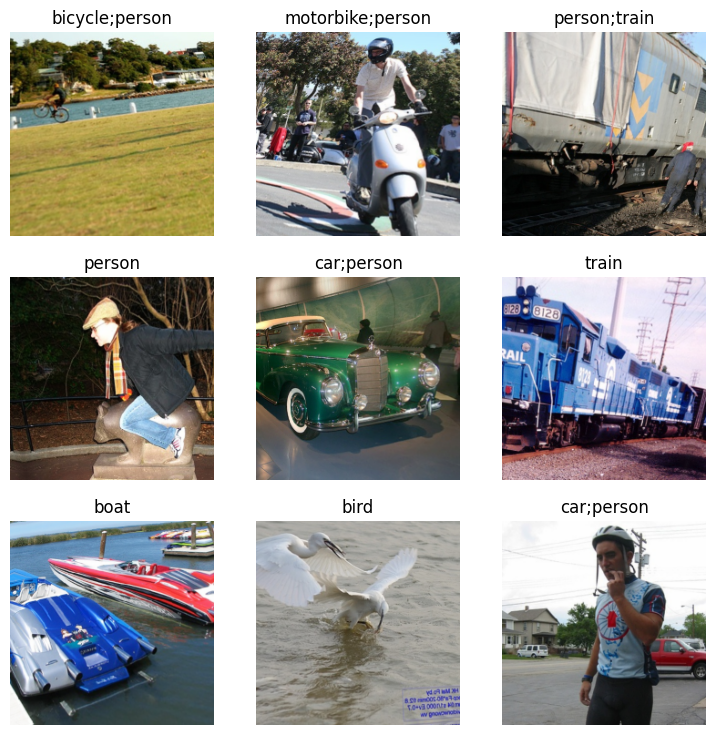

In [9]:
dls.show_batch()

In [10]:
f1_macro = F1ScoreMulti(thresh=0.5, average='macro')
f1_macro.name = 'F1(macro)'
f1_samples = F1ScoreMulti(thresh=0.5, average='samples')
f1_samples.name = 'F1(samples)'
learn = vision_learner(dls, resnet50, metrics=[partial(accuracy_multi, thresh=0.5), f1_macro, f1_samples])

SuggestedLRs(valley=0.001737800776027143)

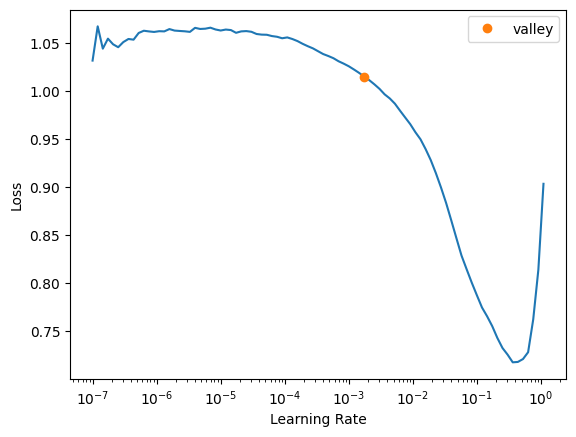

In [11]:
learn.lr_find()

In [13]:
learn.fine_tune(2, 3e-2)

c:\Users\scastaneda\AI_Code\fastai\data\transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


c:\Users\scastaneda\AI_Code\fastai\data\transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
c:\Users\scastaneda\AI_Code\fastai\data\transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


c:\Users\scastaneda\AI_Code\fastai\data\transforms.py:212: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


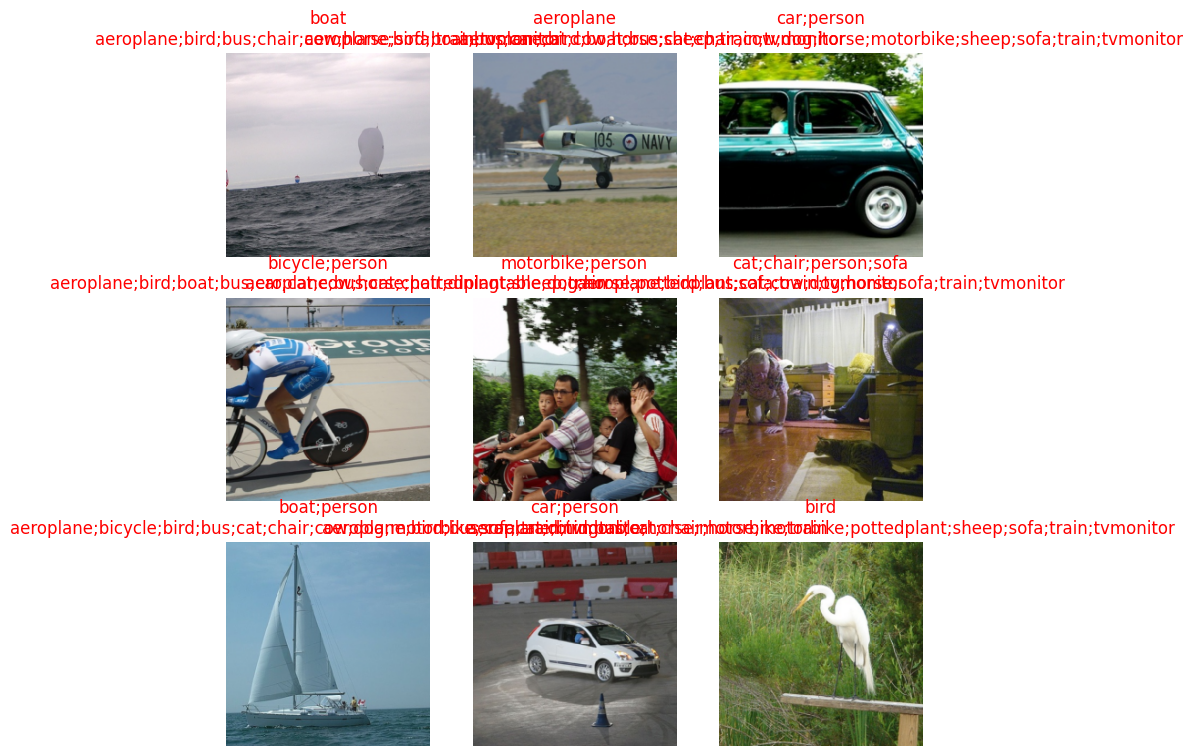

In [12]:
learn.show_results()